In [28]:
from __future__ import print_function
from __future__ import division

%pylab inline
execfile('Data/data.py')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [29]:
data.head()

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation,BirthYear
0,1901,chemistry,Jacobus Henricus van 't Hoff,30 August 1852,Rotterdam,the Netherlands,No Data,"Berlin University, Berlin, Germany","Physical chemistry, chemical kinetics",The Nobel Prize in Chemistry,The Nobel Prize in Chemistry 1901 was awarded ...,1852
1,1901,literature,Sully Prudhomme,16 March 1839,Paris,France,France,No Data,French,The Nobel Prize in Literature,The Nobel Prize in Literature 1901 was awarded...,1839
2,1901,medicine,Emil Adolf von Behring,15 March 1854,Hansdorf (now Jankowa ?aga?ska),Prussia (now Poland),No Data,"Marburg University, Marburg, Germany",No Data,The Nobel Prize in Physiology or Medicine,The Nobel Prize in Physiology or Medicine 1901...,1854
3,1901,peace,Frédéric Passy,20 May 1822,Paris,France,France,Founder and President of first French peace s...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...,1822
4,1901,peace,Jean Henry Dunant,8 May 1828,Geneva,Switzerland,Switzerland,Originator Geneva Convention (Convention de G...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...,1828


# Plotting a Histogram

#### we are printing  the  earliest year in the data


In [30]:
print(data.Year.min())

1901


#### we are printing  the  lastest year in the data.

In [31]:
print(data.Year.max())

2010


He dataset includes entries for economics, which was not one of the original Nobel prizes and has only been awarded since 1969. To ensure a proper comparison, we need to filter out the economics data using a pandas query. We can then verify that no economics prizes are remaining by checking the length of the data after applying the query to select only non-economics prizes. This information will be used in the main analysis to count the number of $B^+$ and $B^-$ mesons.

In [32]:
data_without_economics = data.query("Category!= 'economics'")
print('Number of economics prizes in "data_without_economics":')
print(len(data_without_economics.query("Category == 'economics'")))

Number of economics prizes in "data_without_economics":
0


we can now plot the histpgram over a sensible range the hist function from matplotlib. You will use this throught the main analysis

Text(0, 0.5, 'Number of Winners')

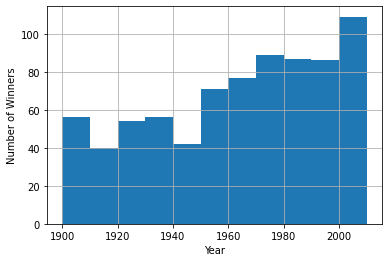

In [35]:
# plot the histogram of number of winners against year
H_WinnersPerYear = data_without_economics.Year.hist(bins=11, range=[1900, 2010]) 
xlabel('Year')
ylabel('Number of Winners')

The statement discusses the trend of multiple prize winners in a given year using a histogram. The histogram shows a recent increase in the number of multiple prize winners, but there is a gap in the range of 1940-1950 due to World War II when the prizes were awarded intermittently. The author suggests changing the bin size of the histogram to isolate this gap and recommends using a slider to adjust the number of bins. This will provide a better visualization of the data and the impact of the gap on the overall trend.

In [36]:
def plot_hist(bins):
    changingBins = data_without_economics.Year.hist(bins=bins, range=[1900,2000])
    xlabel('Year')
    ylabel('Number of People Given Prizes')
    BinSize = round(60/bins, 2)
    print(BinSize)

interact(plot_hist, bins=[2, 50, 1])

interactive(children=(Dropdown(description='bins', options=(2, 50, 1), value=2), Output()), _dom_classes=('wid…

<function __main__.plot_hist(bins)>

Changig the bin size really does change how the data looks !!

"The passage describes the process of selecting data from a dataset based on certain criteria using the pandas library in Python. Specifically, it focuses on filtering out all data except for those related to Physics. The passage mentions that while one could build a new dataset using loops and conditional statements, the .query() function in pandas provides a quicker way to filter data based on a conditional statement passed as a string. Examples of such conditional statements are provided in the passage."

In [37]:
modernPyysics = "(Category == 'physics'&& Year > 2005)" # Integer values don't inside quotes
physicsOnly = "(Category == 'physics')"
#apply the physx.. query
physicsOnlyDataF = data.query(physicsOnly)


### we are create a new database

In [38]:
physicsOnlyDataF

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation,BirthYear
5,1901,physics,Wilhelm Conrad Röntgen,27 March 1845,Lennep (now Remscheid),Prussia (now Germany),No Data,"Munich University, Munich, Germany","X-rays, atomic physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1901 was awarded to...,1845
11,1902,physics,Hendrik Antoon Lorentz,18 July 1853,Arnhem,the Netherlands,No Data,"Leiden University, Leiden, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1853
12,1902,physics,Pieter Zeeman,25 May 1865,Zonnemaire,the Netherlands,No Data,"Amsterdam University, Amsterdam, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1865
17,1903,physics,Antoine Henri Becquerel,15 December 1852,Paris,France,No Data,"école Polytechnique, Paris, France",Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1852
18,1903,physics,"Marie Curie, née Sklodowska",7 November 1867,Warsaw,Russian Empire (now Poland),No Data,NaN,Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1867
...,...,...,...,...,...,...,...,...,...,...,...,...
825,2009,physics,Charles K. Kao,4-Nov-33,Shanghai,China,No Data,"Standard Telecommunication Laboratories, Harl...","Fiber technology, instrumentation",The Nobel Prize in Physics,"The Nobel Prize in Physics 2009 was divided, o...",1933
826,2009,physics,George E. Smith,10-May-30,White Plains NY,USA,No Data,"Bell Laboratories, Murray Hill, NJ, USA","Semiconductor technology, instrumentation",The Nobel Prize in Physics,"The Nobel Prize in Physics 2009 was divided, o...",1930
827,2009,physics,Willard S. Boyle,19-Aug-24,Amherst NS,Canada,No Data,"Bell Laboratories, Murray Hill, NJ, USA","Semiconductor technology, instrumentation",The Nobel Prize in Physics,"The Nobel Prize in Physics 2009 was divided, o...",1924
837,2010,physics,Andre Geim,1958,Sochi,Russia,No Data,"University of Manchester, Manchester, United ...",No Data,The Nobel Prize in Physics,The Nobel Prize in Physics 2010 was awarded jo...,1958


In [39]:
physicsOnlyDataF.head(4)

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation,BirthYear
5,1901,physics,Wilhelm Conrad Röntgen,27 March 1845,Lennep (now Remscheid),Prussia (now Germany),No Data,"Munich University, Munich, Germany","X-rays, atomic physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1901 was awarded to...,1845
11,1902,physics,Hendrik Antoon Lorentz,18 July 1853,Arnhem,the Netherlands,No Data,"Leiden University, Leiden, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1853
12,1902,physics,Pieter Zeeman,25 May 1865,Zonnemaire,the Netherlands,No Data,"Amsterdam University, Amsterdam, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1865
17,1903,physics,Antoine Henri Becquerel,15 December 1852,Paris,France,No Data,"école Polytechnique, Paris, France",Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1852


In [40]:
physicsOnlyDataF.tail()

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation,BirthYear
825,2009,physics,Charles K. Kao,4-Nov-33,Shanghai,China,No Data,"Standard Telecommunication Laboratories, Harl...","Fiber technology, instrumentation",The Nobel Prize in Physics,"The Nobel Prize in Physics 2009 was divided, o...",1933
826,2009,physics,George E. Smith,10-May-30,White Plains NY,USA,No Data,"Bell Laboratories, Murray Hill, NJ, USA","Semiconductor technology, instrumentation",The Nobel Prize in Physics,"The Nobel Prize in Physics 2009 was divided, o...",1930
827,2009,physics,Willard S. Boyle,19-Aug-24,Amherst NS,Canada,No Data,"Bell Laboratories, Murray Hill, NJ, USA","Semiconductor technology, instrumentation",The Nobel Prize in Physics,"The Nobel Prize in Physics 2009 was divided, o...",1924
837,2010,physics,Andre Geim,1958,Sochi,Russia,No Data,"University of Manchester, Manchester, United ...",No Data,The Nobel Prize in Physics,The Nobel Prize in Physics 2010 was awarded jo...,1958
838,2010,physics,Konstantin Novoselov,1974,Nizhny Tagil,Russia,No Data,"University of Manchester, Manchester, United ...",No Data,The Nobel Prize in Physics,The Nobel Prize in Physics 2010 was awarded jo...,1974


In [41]:
physicsOnlyDataF.isnull().sum()

Year              0
Category          0
Name              0
Birthdate         0
Birth Place       0
County            0
Residence         0
Role/Affiliate    2
Field/Language    0
Prize Name        0
Motivation        0
BirthYear         0
dtype: int64

Text(0, 0.5, 'Number of Winner in Physics')

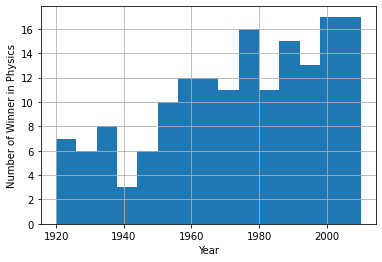

In [42]:
h_PhysicsWinnerPerYear = physicsOnlyDataF.Year.hist(bins=15, range=[1920,2010])
xlabel('Year') #Plot an x label
ylabel('Number of Winner in Physics') # Plot a y label

####  we have now successfully plotted the histogram of just the physics prizes after applying our pre-selections.

# Calculations, Scatter Plots and 2D Histogram
### Adding New Data to a Data Frame

The section is focused on creating a Dalitz plot for particle physics analysis. However, it also provides instructions for analyzing the ages of Nobel Prize winners.

The first step is to calculate the age of the winners at the time they were awarded the Nobel Prize by using the Year and Birthdate columns. This can be done by creating a new variable called AgeAwarded. The goal is to measure the spread in ages and consider if there has been a trend in Nobel Prize winners being awarded earlier or later in their life.

In [44]:
#Create new variables in the dataframe
physicsOnlyDataF['AgeAwarded'] = physicsOnlyDataF.Year - physicsOnlyDataF.BirthYear
physicsOnlyDataF.head(5)

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation,BirthYear,AgeAwarded
5,1901,physics,Wilhelm Conrad Röntgen,27 March 1845,Lennep (now Remscheid),Prussia (now Germany),No Data,"Munich University, Munich, Germany","X-rays, atomic physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1901 was awarded to...,1845,56
11,1902,physics,Hendrik Antoon Lorentz,18 July 1853,Arnhem,the Netherlands,No Data,"Leiden University, Leiden, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1853,49
12,1902,physics,Pieter Zeeman,25 May 1865,Zonnemaire,the Netherlands,No Data,"Amsterdam University, Amsterdam, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1865,37
17,1903,physics,Antoine Henri Becquerel,15 December 1852,Paris,France,No Data,"école Polytechnique, Paris, France",Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1852,51
18,1903,physics,"Marie Curie, née Sklodowska",7 November 1867,Warsaw,Russian Empire (now Poland),No Data,NaN,Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1867,36


### plot a histogram of the laurates ages

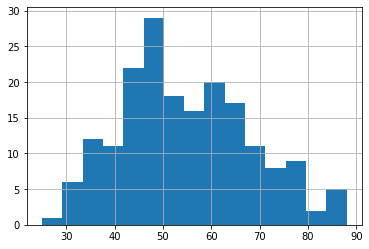

In [45]:
h_AgeAwarded = physicsOnlyDataF.AgeAwarded.hist(bins=15)

### We're doing calculations.

- Lets calcute a measure of the spread in ages of the leatures. we will calculate the standart deviation pf the distribution

In [47]:
# count number of entries
NumEntries = len(physicsOnlyDataF)
#calculate square of ages
physicsOnlyDataF['AgeAwardedSquared'] = physicsOnlyDataF.AgeAwarded**2
#calculate sum of square of ages, and sum of ages
ageSqSum = physicsOnlyDataF['AgeAwardedSquared'].sum()
ageSum = physicsOnlyDataF['AgeAwarded'].sum()
#calculate std and print it
std = sqrt((ageSqSum-(ageSum**2/NumEntries))/NumEntries)
print(std)

13.314524371459262


- there is actually a function that would calculate the rms for you, but we wanted to teach you how to manipulate data to amke calculations!!!!

In [48]:
# calculate standart deviation (rms) of distrubation
print(physicsOnlyDataF['AgeAwarded'].std())

13.350268125361112


#  Scatter Plot

- Now lets plot a scatter plot of age vs Date awarded

Text(0, 0.5, 'Age Awarded')

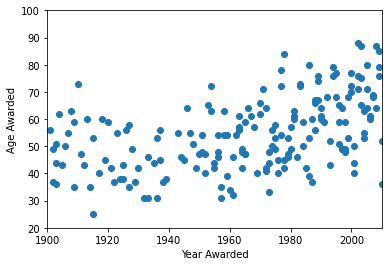

In [50]:
scatter(physicsOnlyDataF['Year'], physicsOnlyDataF['AgeAwarded']);
plt.xlim(1900,2010) # change the x axis range
plt.ylim(20,100)
xlabel('Year Awarded')
ylabel('Age Awarded')

2D Histogram

Choosing an appropriate bin size is a crucial factor in representing the underlying distribution of data accurately in a histogram. The choice of bin size can affect the shape of the histogram as well as the visualization of any patterns or trends in the data.

When using the hist2d function in Matplotlib, the specified bin number is the number of bins on a single axis. The total number of bins in the resulting histogram is equal to the square of the specified bin number.

A common method for determining an appropriate bin number for a dataset is to use the square root of the number of data points as the bin number. However, this may not always be optimal, and other methods such as the Freedman-Diaconis, Scott, or Sturges rules can be used to estimate the bin number.

It is important to experiment with different bin sizes and observe how the resulting histogram changes. If the bin size is too large, important details in the distribution of the data may be lost. On the other hand, if the bin size is too small, the resulting histogram may be overly detailed and difficult to interpret.

Text(0, 0.5, 'Age Awarded')

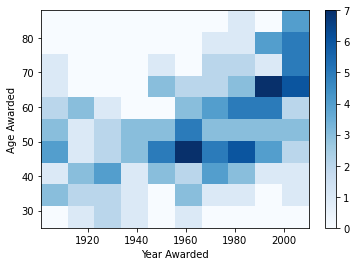

In [51]:
hist2d(physicsOnlyDataF.Year, physicsOnlyDataF.AgeAwarded, bins =10)
colorbar()
xlabel('Year Awarded')
ylabel('Age Awarded')

alternatively you can use interact to add a silder to vary the number of this 

In [53]:
def plot_histogram(bins):
    hist2d(physicsOnlyDataF['Year'].values, physicsOnlyDataF['AgeAwarded'].values, bins=bins)
    colorbar() # how we decided to set a colour legend
    xlabel('Year  Awarded')
    ylabel('Age Awarded')

interact(plot_histogram, bins=[1,20,1]) # how we create silder

interactive(children=(Dropdown(description='bins', options=(1, 20, 1), value=1), Output()), _dom_classes=('wid…

<function __main__.plot_histogram(bins)>

- You can playing with the silder then silder show you the effect of changing bthe in size in a 2D histogram. The darker bins in the top corner show thtat there does appear to be a trend of nobel prizes being won at an older age in more recent

## Making 2D histograms manipulable

- The main analysis requires the calculation of an asymmetry, and this section provides an example of how to do it using the Nobel Prize dataset. Reading this section after reaching the "Searching for local matter anti-matter differences" section is recommended.

Text(0, 0.5, 'Age Awarded')

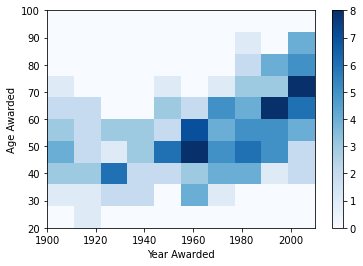

In [54]:
physics_counts, xedges, yedges, Image = hist2d(
    physicsOnlyDataF.Year, physicsOnlyDataF.AgeAwarded,
    bins = 10 , range=[(1900,2010),(20,100)]
)
colorbar()
xlabel('Year Awarded')
ylabel('Age Awarded')

- In reality, what we're discussing here is the charting of values at a specific period that I choose on my own.


In [57]:
#We making the "chemistryOnlyDF" dataset
chemistryOnlyDF = data.query("(Category == 'chemistry')")
chemistryOnlyDF['AgeAwarded'] = chemistryOnlyDF.Year - chemistryOnlyDF.BirthYear

Text(0, 0.5, 'Age Awarded')

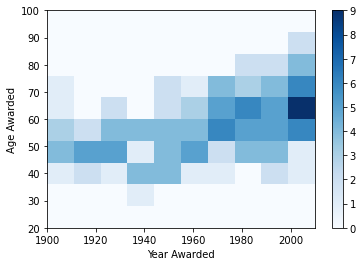

In [58]:
# plot the histogram
chemistry_counts, xedges, yedges, Image= hist2d(
    chemistryOnlyDF.Year, chemistryOnlyDF.AgeAwarded,
    bins=10, range=[(1900, 2010), (20, 100)]
)
colorbar() # Add a colour legend
xlabel('Year Awarded')
ylabel('Age Awarded')

In [59]:
counts = (physics_counts - chemistry_counts) / (physics_counts + chemistry_counts)

In [60]:
counts[np.isnan(counts)] = 0

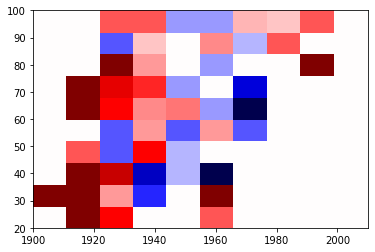

In [62]:
pcolor(xedges,yedges,counts,cmap='seismic') ;